https://doi.org/10.3844/jcssp.2020.1401.1416

https://medium.com/swlh/a-technical-guide-on-rnn-lstm-gru-for-stock-price-prediction-bce2f7f30346

https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/

https://www.tensorflow.org/tutorials/structured_data/time_series

In [1]:
# import tensorflow as tf
# import logging

# tf.get_logger().setLevel(logging.ERROR)
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
from utils import (
    build_dataframe,
    build_window,
    build_model,
    evaluate_model,
    summarize_scores,
    plot_scores,
    generate_actuals_and_predictions,
    plot_offset,
)

import functools

In [4]:
df = build_dataframe()

df

,high,open,low,close,volume,adjclose
date,,,,,,
1999-01-04,1248.810059,1229.229980,1219.099976,1228.099976,877000000,1228.099976
1999-01-05,1246.109985,1228.099976,1228.099976,1244.780029,775000000,1244.780029
1999-01-06,1272.500000,1244.780029,1244.780029,1272.339966,986900000,1272.339966
1999-01-07,1272.339966,1272.339966,1257.680054,1269.729980,863000000,1269.729980
1999-01-08,1278.239990,1269.729980,1261.819946,1275.089966,937800000,1275.089966
...,...,...,...,...,...,...
2019-12-24,3226.429932,3225.449951,3220.510010,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3247.229980,3234.370117,3240.020020,2428670000,3240.020020


In [5]:
# univariate multi-step lstm

label_columns = ["adjclose"]

window, scaler = build_window(df, label_columns)

score_map = {}

for model_name in ["last", "repeat", "lstm", "gru", "tcn", "nbeats"]:
    print("-" * 30, model_name, "-" * 30)
    model = build_model(model_name, window)  # , verbose=1, epochs=10)

    score, scores = evaluate_model(model, window, scaler)
    score_map[model_name] = score, scores

    print()
    summarize_scores(model_name, score, scores)
    print()

score_map
# plot_scores("lstm", scores)

------------------------------ last ------------------------------
Restoring model weights from the end of the best epoch: 1.
Epoch 00051: early stopping

last: [43.488] 1: 25.6, 2: 30.7, 3: 34.8, 4: 38.6, 5: 42.0, 6: 45.1, 7: 48.0, 8: 50.7, 9: 53.3, 10: 55.7

------------------------------ repeat ------------------------------
Restoring model weights from the end of the best epoch: 1.
Epoch 00051: early stopping

repeat: [76.931] 1: 76.8, 2: 76.8, 3: 76.9, 4: 76.9, 5: 76.9, 6: 76.9, 7: 77.0, 8: 77.0, 9: 77.1, 10: 77.1

------------------------------ lstm ------------------------------
Restoring model weights from the end of the best epoch: 61.
Epoch 00111: early stopping

lstm: [189.850] 1: 88.2, 2: 123.1, 3: 142.3, 4: 164.5, 5: 180.7, 6: 193.5, 7: 212.9, 8: 228.4, 9: 242.3, 10: 252.8

------------------------------ gru ------------------------------
Restoring model weights from the end of the best epoch: 18.
Epoch 00068: early stopping

gru: [271.573] 1: 200.0, 2: 230.3, 3: 241.0, 4:

{'last': (43.488251943134266,
  [25.597105,
   30.712809,
   34.793476,
   38.57954,
   42.03652,
   45.137436,
   47.98401,
   50.72786,
   53.25884,
   55.66043]),
 'repeat': (76.9309291205789,
  [76.79044,
   76.81953,
   76.85184,
   76.87514,
   76.90536,
   76.94015,
   76.98248,
   77.020546,
   77.05041,
   77.07284]),
 'lstm': (189.8502051211736,
  [88.16305,
   123.13161,
   142.26685,
   164.51749,
   180.68079,
   193.51082,
   212.86337,
   228.4245,
   242.32048,
   252.76721]),
 'gru': (271.5728347428011,
  [200.0085,
   230.3153,
   240.99785,
   255.24658,
   271.11597,
   281.7288,
   287.96732,
   297.31433,
   308.12146,
   319.53705]),
 'tcn': (43.573930540014345,
  [26.429111,
   31.126503,
   35.126575,
   38.81468,
   42.161293,
   45.1933,
   47.96406,
   50.640724,
   53.10051,
   55.44686]),
 'nbeats': (47.3630100905799,
  [32.012012,
   36.36525,
   39.49176,
   43.515293,
   46.219524,
   48.846584,
   51.333153,
   53.7437,
   56.135372,
   58.61123])}

In [ ]:
model_name = "tcn_tuned"  #'tuned_tcn'
model = build_model(model_name, window)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

print()
summarize_scores(model_name, score, scores)
print()

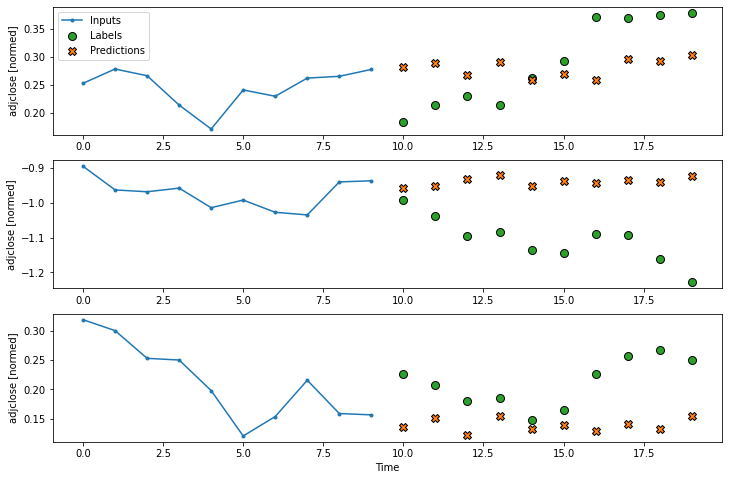

In [6]:
window._example = None
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

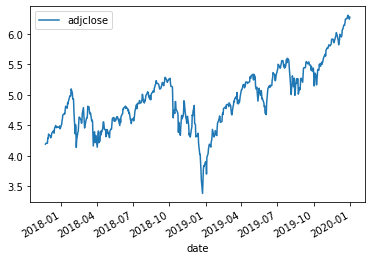

In [7]:
window.test_df.plot();

In [8]:
window.test_df[16:]

,adjclose
date,
2017-12-15,4.449782
2017-12-18,4.496949
2017-12-19,4.468386
2017-12-20,4.461089
2017-12-21,4.478575
...,...
2019-12-24,6.249621
2019-12-26,6.303955
2019-12-27,6.304317


In [9]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_offset_partial = functools.partial(plot_offset, actuals, predictions, window)

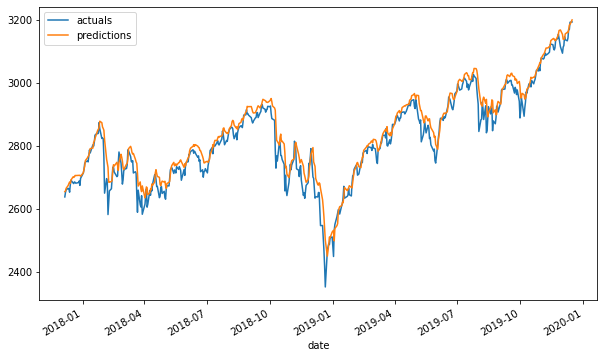

In [10]:
plot_offset_partial()

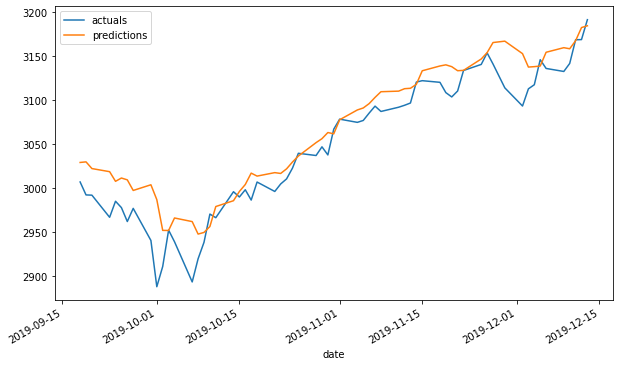

In [11]:
plot_offset_partial(day_slice=slice(-63, -1))

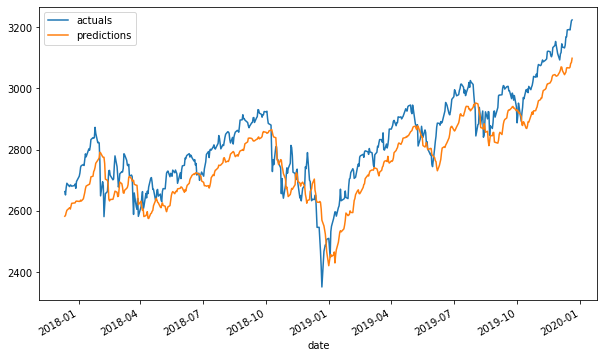

In [12]:
plot_offset_partial(4)

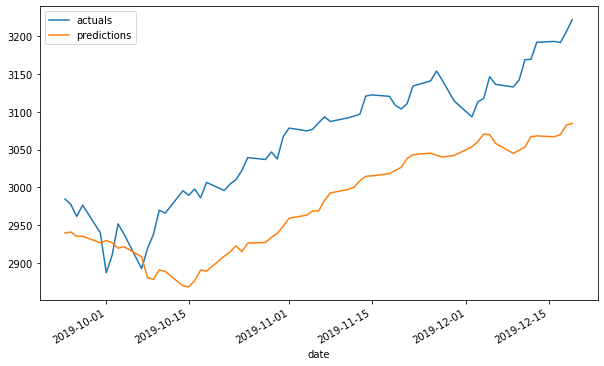

In [13]:
plot_offset_partial(4, day_slice=slice(-63, -1))

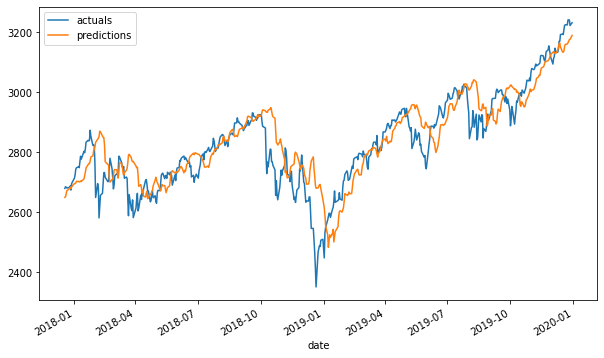

In [14]:
plot_offset_partial(9)

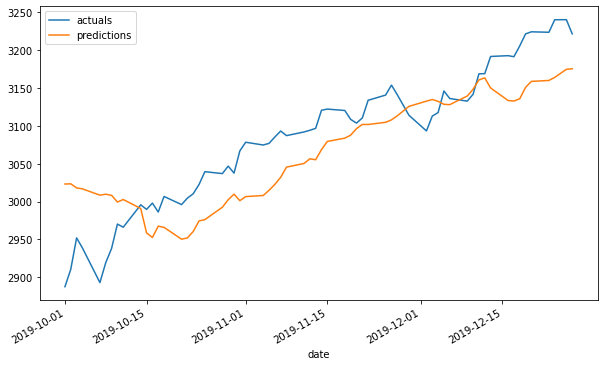

In [15]:
plot_offset_partial(9, day_slice=slice(-63, -1))

# Tuning

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tcn import TCN

from constants import LABELS_LENGTH, INPUT_LENGTH, FEATURES_LENGTH


def build_model(hp):
    model = Sequential()
    model.add(
        TCN(
            nb_filters=hp.Int("nb_filters", min_value=64, max_value=256, step=32),
            kernel_size=hp.Int("kernel_size", min_value=2, max_value=8),
            dropout_rate=hp.Choice("dropout_rate", values=[0.1, 0.05, 0.0]),
            input_shape=(INPUT_LENGTH, FEATURES_LENGTH),
        )
    )
    model.add(Dense(LABELS_LENGTH))
    # 96, 8, 0; 240, 7, 0; 64, 7, 0

    model.compile(
        loss="mse",
        optimizer="adam",
        metrics=[tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()],
    )

    return model

In [22]:
import keras_tuner as kt
import datetime as dt

tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=32,
    overwrite=True,
)

tuner.search(window.train(), validation_data=window.val())

Trial 32 Complete [00h 00m 46s]
val_loss: 0.08595427125692368

Best val_loss So Far: 0.022840239107608795
Total elapsed time: 00h 25m 37s
INFO:tensorflow:Oracle triggered exit


In [23]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 224)               3868256   
                                                                 
 dense (Dense)               (None, 10)                2250      
                                                                 
Total params: 3,870,506
Trainable params: 3,870,506
Non-trainable params: 0
_________________________________________________________________


In [24]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
nb_filters: 224
kernel_size: 7
dropout_rate: 0.1
Score: 0.022840239107608795
Trial summary
Hyperparameters:
nb_filters: 224
kernel_size: 8
dropout_rate: 0.05
Score: 0.026913298293948174
Trial summary
Hyperparameters:
nb_filters: 96
kernel_size: 7
dropout_rate: 0.05
Score: 0.034312695264816284
Trial summary
Hyperparameters:
nb_filters: 96
kernel_size: 4
dropout_rate: 0.0
Score: 0.034831736236810684
Trial summary
Hyperparameters:
nb_filters: 192
kernel_size: 4
dropout_rate: 0.05
Score: 0.03713167831301689
Trial summary
Hyperparameters:
nb_filters: 224
kernel_size: 8
dropout_rate: 0.1
Score: 0.0385550782084465
Trial summary
Hyperparameters:
nb_filters: 160
kernel_size: 7
dropout_rate: 0.05
Score: 0.03898026794195175
Trial summary
Hyperparameters:
nb_filters: 128
kernel_size: 5
dropout_rate: 0.1
Score: 0.04180534556508064
Trial summary
Hyperparamet

In [ ]:
model.save("my_model.h5")

In [27]:
window.test_df.iloc[len(window.test_df) - 10 : len(window.test_df)]

,adjclose
date,
2019-12-17,6.148186
2019-12-18,6.143650
2019-12-19,6.190424
2019-12-20,6.242522
2019-12-23,6.251692
2019-12-24,6.249621
2019-12-26,6.303955
2019-12-27,6.304317
2019-12-30,6.242752
